## Multiple Linear Regression
## Problem statement:
Build a Multiple Linear Regression Model to predict sales based on the money spent on TV, Radio, and Newspaper for advertising.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Reading the dataset

In [9]:
df = pd.read_csv('D:\\5.1_Machine_Learning_Code\\Regression\\Advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [11]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

## Feature Importance

In [14]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


## Plotting correlation heatmap

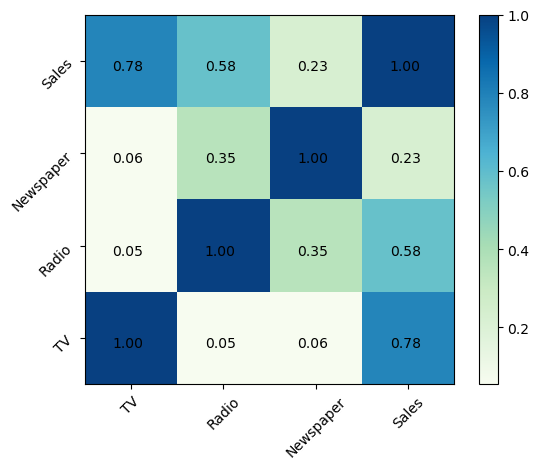

In [17]:
plt.ylim(-.5,3.5)
plt.imshow(df.corr(), cmap=plt.cm.GnBu, interpolation='nearest',data=True)
plt.colorbar()
tick_marks = [i for i in range(len(df.columns))]
plt.xticks(tick_marks, df.columns, rotation=45)
plt.yticks(tick_marks, df.columns, rotation=45)

# Putting annotations
for i in range(len(df.columns)):
    for j in range(len(df.columns)):
        text = '%.2f'%(df.corr().iloc[i,j])
        plt.text(i-0.2,j-0.1,text)

In [23]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 100)

In [27]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [29]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(X, mlr.coef_))

Intercept:  2.909111350533923
Coefficients:


[('TV', 0.04545698966500145),
 ('Radio', 0.18789035405717186),
 ('Newspaper', 0.0006479583241943728)]

In [31]:
#Prediction of test set
y_pred= mlr.predict(X_test)

#Predicted values
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [10.60539733 20.18503961 16.9196654  19.1376544  21.05093184 13.29921705
 11.94014411 12.5528517  20.60669083 21.03019772 11.00215772 19.45842742
  6.55401355 15.41657608  9.10684915  8.11707097 16.40680706 12.13424389
 17.26048908 11.33550884]


In [33]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
mlr_diff.head()

,Actual value,Predicted value
126,6.6,10.605397
104,20.7,20.185040
99,17.2,16.919665
92,19.4,19.137654
111,21.8,21.050932


In [35]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('R squared: {:.2f}'.format(mlr.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 89.71
Mean Absolute Error: 1.02317430902799
Mean Square Error: 1.8348089197614226
Root Mean Square Error: 1.354551187575214
